# Diabetes prediction solution

In [26]:
#pip install graphviz 

In [27]:
#pip install --upgrade pip

In [2]:
import timeit
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from pickle import dump
import xgboost as xgb
from xgboost import plot_tree
from sklearn.metrics import mean_squared_error, r2_score


/tmp/ipykernel_40358/2149444487.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Boosting models

In [3]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,49.000000,25.4,0.304,21.0,0
1,9.0,112.0,63.333333,28.2,0.217,50.0,1
2,1.0,139.0,83.000000,28.7,0.654,22.0,0
3,0.0,161.0,41.000000,21.9,0.254,65.0,0
4,6.0,134.0,49.000000,46.2,0.238,46.0,1


In [4]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

# 1.XGBClassifier

In [32]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 200, learning_rate = 0.001, random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## MSE, R2

In [34]:
# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcula el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio (MSE): 0.35714285714285715
Coeficiente de determinación (R cuadrado): -0.555555555555556


## Accuracy

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.6428571428571429


# 2.GradientBoostingRegressor with gridsearch

In [12]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,49.000000,25.4,0.304,21.0,0
1,9.0,112.0,63.333333,28.2,0.217,50.0,1
2,1.0,139.0,83.000000,28.7,0.654,22.0,0
3,0.0,161.0,41.000000,21.9,0.254,65.0,0
4,6.0,134.0,49.000000,46.2,0.238,46.0,1


In [13]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = GradientBoostingRegressor()

# Definir la cuadrícula de búsqueda de hiperparámetros
param_grid = {
    "n_estimators": [50, 100],
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [7]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo RandomForestClassifier con los mejores hiperparámetros
rf_classifier_best = GradientBoostingRegressor(**best_params)

# Ajustar el modelo a los datos de entrenamiento
rf_classifier_best.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = rf_classifier_best.predict(X_test)

## MSE, R2

In [9]:
# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcula el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio (MSE): 0.17019566443827847
Coeficiente de determinación (R cuadrado): 0.2587033282243869


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score



# Supongamos que 'y_pred' contiene las predicciones continuas de tu modelo
y_pred_continuo = y_pred

# Aplica la función sigmoide para obtener valores binarios (0 o 1)
y_pred_binario = np.where(y_pred_continuo >= 0.5, 1, 0)

print("Valores continuos predichos:", y_pred_continuo)
print("Valores binarios ajustados:", y_pred_binario)

Valores continuos predichos: [ 5.15240675e-01  2.01575200e-01  8.79231645e-02  3.39947978e-01
  6.56762758e-01  5.22351898e-01 -3.60947321e-02  5.94649559e-01
  4.78401352e-01  5.29841325e-01  2.06015534e-01  7.26569965e-01
  3.65038098e-01  4.75776832e-01  2.07110207e-01  4.43358254e-01
  7.59787783e-02  2.72143197e-02  6.00316958e-01  5.69839006e-01
  2.72277975e-01  1.31571883e-01  4.74780486e-01  5.09012850e-02
  6.14767679e-01  9.06607950e-01  1.11614504e-01 -2.64032306e-04
  1.60491244e-01  1.72846902e-01  8.35452652e-01  4.17963348e-01
  8.04730922e-01  8.55003760e-01  6.28538967e-01  6.78698168e-01
  9.50077498e-01  4.23144153e-01  3.25383296e-01  5.49864752e-01
  2.31968543e-02  4.41152611e-01  5.62999871e-01  3.98910847e-01
  3.67842318e-02  6.01367425e-01  5.49321316e-01  9.53733140e-02
  3.83480082e-01  1.01802212e+00 -3.51861984e-02  7.84926735e-01
  7.17161124e-01  2.02036632e-01  5.43521559e-02  3.17318891e-02
  5.14362810e-01  1.32956295e-01  2.76648765e-01  7.35493242e

## Accuracy

In [11]:
accuracy = accuracy_score(y_test, y_pred_binario)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7337662337662337


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir el modelo GradientBoostingRegressor con los mejores hiperparámetros
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
model = GradientBoostingRegressor(**best_params)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_continuo = model.predict(X_test)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred_continuo)
print("Error cuadrático medio (MSE):", mse)

# Calcula el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, y_pred_continuo)
print("Coeficiente de determinación (R cuadrado):", r2)

# Aplica la función sigmoide para obtener valores binarios (0 o 1)
y_pred_binario = np.where(y_pred_continuo >= 0.5, 1, 0)

# Imprimir algunas predicciones continuas y binarias para verificar
print("Valores continuos predichos:", y_pred_continuo[:10])
print("Valores binarios ajustados:", y_pred_binario[:10])

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_binario)
print("Precisión del modelo:", accuracy)


Error cuadrático medio (MSE): 0.16905602543718634
Coeficiente de determinación (R cuadrado): 0.2636670892069215
Valores continuos predichos: [0.45316162 0.2155836  0.11485401 0.13290898 0.71990078 0.63240358
 0.04523074 0.67001741 0.65580704 0.58150566]
Valores binarios ajustados: [0 0 0 0 1 1 0 1 1 1]
Precisión del modelo: 0.7532467532467533


# Best model/ Dump

In [29]:
dump(model, open("../models/GradientBoostingRegressor_Gridsearch_learning_rate_0.1_max_depth_3_max_features_sqrt_min_samples_leaf_1_min_samples_split_2_n_estimators_50.sav", "wb"))

# 3.GradientBoostingClassifier with gridsearch

In [15]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,49.000000,25.4,0.304,21.0,0
1,9.0,112.0,63.333333,28.2,0.217,50.0,1
2,1.0,139.0,83.000000,28.7,0.654,22.0,0
3,0.0,161.0,41.000000,21.9,0.254,65.0,0
4,6.0,134.0,49.000000,46.2,0.238,46.0,1


In [16]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = GradientBoostingClassifier()

# Definir la cuadrícula de búsqueda de hiperparámetros
param_grid = {
    "n_estimators": [50, 100],
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [18]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo RandomForestClassifier con los mejores hiperparámetros
rf_classifier_best = GradientBoostingRegressor(**best_params)

# Ajustar el modelo a los datos de entrenamiento
rf_classifier_best.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = rf_classifier_best.predict(X_test)

## MSE, R2

In [19]:
# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcula el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio (MSE): 0.17368788416616276
Coeficiente de determinación (R cuadrado): 0.24349277118737978


In [20]:
import numpy as np
from sklearn.metrics import accuracy_score

# Supongamos que 'y_pred' contiene las predicciones continuas de tu modelo
y_pred_continuo = y_pred

# Aplica la función sigmoide para obtener valores binarios (0 o 1)
y_pred_binario = np.where(y_pred_continuo >= 0.5, 1, 0)

print("Valores continuos predichos:", y_pred_continuo)
print("Valores binarios ajustados:", y_pred_binario)

Valores continuos predichos: [ 0.53326231  0.18817266  0.10910563  0.40514941  0.73536163  0.60440136
 -0.05711612  0.75615348  0.53583358  0.56955174  0.26214248  0.78160173
  0.36028781  0.51840776  0.35279626  0.45716923  0.04506978  0.04530916
  0.66685156  0.5574613   0.35326401  0.17253174  0.5180271   0.02535332
  0.52569712  0.91307873  0.081556    0.04429435  0.11516351  0.17533033
  0.79521829  0.32526475  0.79827362  0.94058864  0.73616636  0.76465895
  1.00127147  0.4490386   0.36238469  0.55453003  0.09497421  0.4526518
  0.63892459  0.39754746 -0.05568385  0.56247039  0.58560895  0.10212102
  0.32204186  0.97232792 -0.02841479  0.98575869  0.63668865  0.29257953
  0.02872412  0.07467324  0.60290983  0.1401344   0.19148651  0.86368838
  0.62442538  0.33204764  0.1159717   0.36782998  0.1794367   0.47670877
  0.37075089  0.9100208   0.02072303  0.98526748  0.71529548  0.15676438
 -0.13239161  0.10268849  0.07707372  0.08673842  0.20707563  0.15298373
  0.23463699  0.2414936

## Accuracy

In [21]:
accuracy = accuracy_score(y_test, y_pred_binario)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7272727272727273


# 4.XGBRegressor

In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

In [36]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

<Figure size 1000x1000 with 0 Axes>

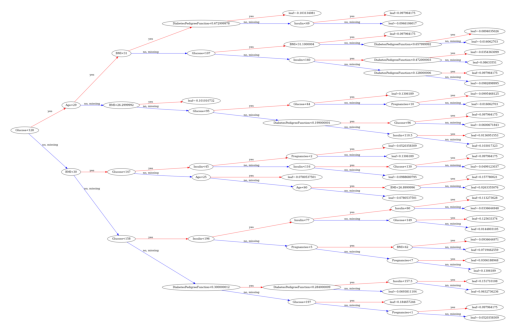

<Figure size 1000x1000 with 0 Axes>

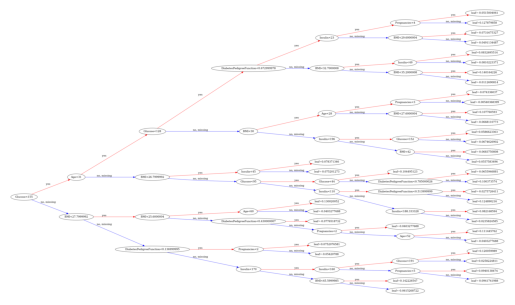

<Figure size 1000x1000 with 0 Axes>

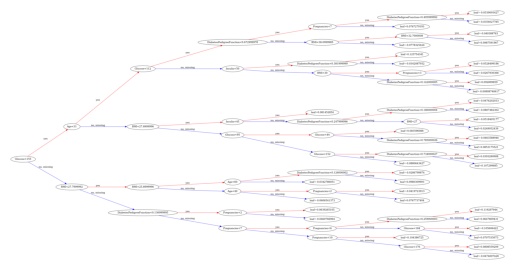

<Figure size 1000x1000 with 0 Axes>

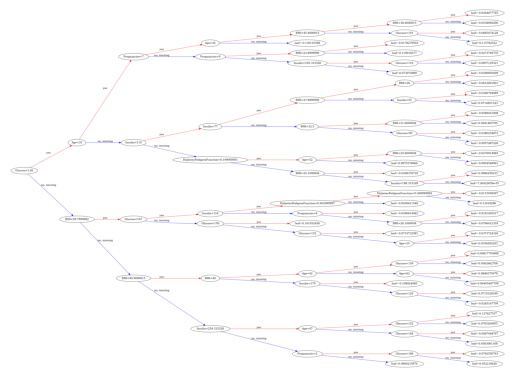

<Figure size 1000x1000 with 0 Axes>

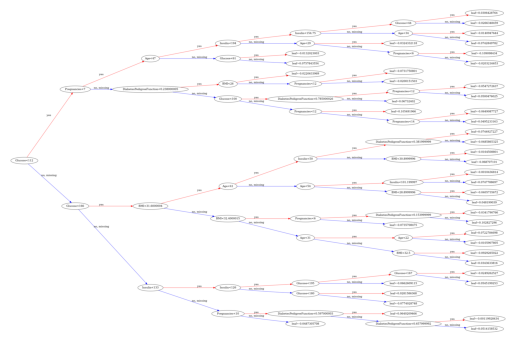

<Figure size 1000x1000 with 0 Axes>

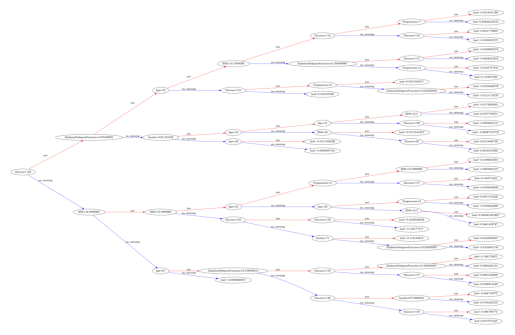

<Figure size 1000x1000 with 0 Axes>

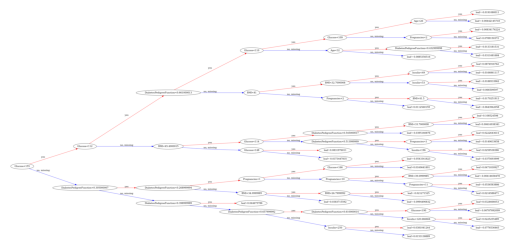

<Figure size 1000x1000 with 0 Axes>

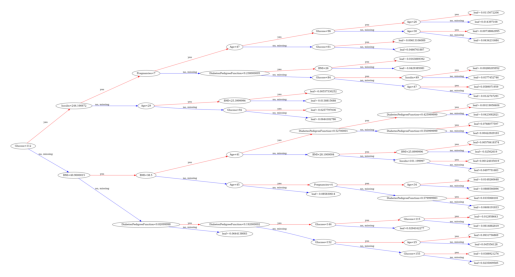

<Figure size 1000x1000 with 0 Axes>

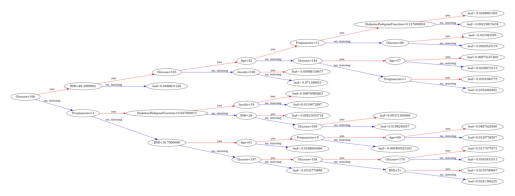

<Figure size 1000x1000 with 0 Axes>

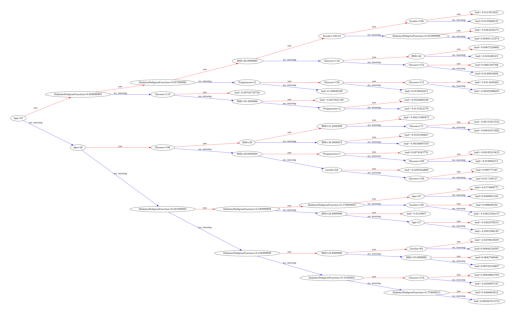

In [37]:
# Ejemplo de datos de entrenamiento
# Reemplaza esto con tus propios datos
X_train = train_data.drop(["Outcome"], axis=1)
y_train = train_data["Outcome"]
# Configuración del modelo XGBoost
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
# Entrenar el modelo XGBoost
num_estimators = 10  # Puedes ajustar esto según tus necesidades
model = xgb.XGBRegressor(n_estimators=num_estimators, **params)
model.fit(X_train, y_train)
    # Mostrar los árboles de decisión con un tamaño de figura más grande
for i in range(num_estimators):
    plt.figure(figsize=(10, 10))  # Ajusta el tamaño según tus preferencias
    plot_tree(model, num_trees=i, rankdir='LR')  # Puedes ajustar 'rankdir' según tus preferencias
    plt.show()

In [38]:
y_pred = model.predict(X_test)
y_pred

array([ 5.26522338e-01,  2.95607954e-01,  2.54768431e-02,  3.66492391e-01,
        6.58250034e-01,  6.53655171e-01, -2.69582681e-03,  6.49370432e-01,
        3.02139610e-01,  6.79333806e-01,  1.99697912e-02,  9.13110971e-01,
        7.99517184e-02,  7.51498282e-01,  4.83481199e-01,  4.07820106e-01,
        9.76142287e-02,  2.13582516e-02,  9.13986981e-01,  8.87650907e-01,
        3.71465445e-01,  1.03196993e-01,  3.42009783e-01,  3.92074138e-02,
        4.85096604e-01,  1.04134691e+00,  1.15079276e-01,  1.02936942e-02,
        1.70787469e-01,  3.60269435e-02,  8.90421450e-01,  1.71873301e-01,
        8.11647594e-01,  8.70661795e-01,  9.62303698e-01,  3.27583998e-01,
        5.65352261e-01,  3.02874357e-01,  3.89781356e-01,  7.48027027e-01,
        5.87829426e-02,  6.13659732e-02,  8.98296833e-01,  5.76028645e-01,
        3.84016037e-02,  9.75450873e-01,  6.17195785e-01,  1.14386931e-01,
       -9.74996611e-02,  5.89447081e-01, -2.69582681e-03,  9.33285415e-01,
        5.78899860e-01,  

## MSE, R2

In [39]:

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcula el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio (MSE): 0.20135303771877358
Coeficiente de determinación (R cuadrado): 0.12299565793600808


## Accuracy

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score

# Supongamos que 'y_pred' contiene las predicciones continuas de tu modelo
y_pred_continuo = y_pred

# Aplica la función sigmoide para obtener valores binarios (0 o 1)
y_pred_binario = np.where(y_pred_continuo >= 0.5, 1, 0)

print("Valores continuos predichos:", y_pred_continuo)
print("Valores binarios ajustados:", y_pred_binario)


Valores continuos predichos: [ 5.26522338e-01  2.95607954e-01  2.54768431e-02  3.66492391e-01
  6.58250034e-01  6.53655171e-01 -2.69582681e-03  6.49370432e-01
  3.02139610e-01  6.79333806e-01  1.99697912e-02  9.13110971e-01
  7.99517184e-02  7.51498282e-01  4.83481199e-01  4.07820106e-01
  9.76142287e-02  2.13582516e-02  9.13986981e-01  8.87650907e-01
  3.71465445e-01  1.03196993e-01  3.42009783e-01  3.92074138e-02
  4.85096604e-01  1.04134691e+00  1.15079276e-01  1.02936942e-02
  1.70787469e-01  3.60269435e-02  8.90421450e-01  1.71873301e-01
  8.11647594e-01  8.70661795e-01  9.62303698e-01  3.27583998e-01
  5.65352261e-01  3.02874357e-01  3.89781356e-01  7.48027027e-01
  5.87829426e-02  6.13659732e-02  8.98296833e-01  5.76028645e-01
  3.84016037e-02  9.75450873e-01  6.17195785e-01  1.14386931e-01
 -9.74996611e-02  5.89447081e-01 -2.69582681e-03  9.33285415e-01
  5.78899860e-01  1.51128590e-01  3.82049307e-02  2.13582516e-02
  7.77462065e-01  4.65343259e-02  3.82459939e-01  6.76021397e

In [41]:
accuracy = accuracy_score(y_test, y_pred_binario)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7012987012987013


# **Comparar models**

In [5]:
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Lista de nombres de archivos de modelos guardados
model_files = [
    "/workspaces/Boosting-Algorithms/models/GradientBoostingRegressor_Gridsearch_learning_rate_0.1_max_depth_3_max_features_sqrt_min_samples_leaf_1_min_samples_split_2_n_estimators_50.sav",
    "/workspaces/Boosting-Algorithms/models/ranfor_classifier_max_depth_10max_features_sqrt_min_samples_leaf_4min_samples_split_10n_estimators_50.sav",
    "/workspaces/Boosting-Algorithms/models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav"
]

# Lista de nombres descriptivos para los modelos
model_names = ["Modelo 1-GradientBoostingRegressor", "Modelo 2-randomForest_Classifier", "Modelo 3-tree_classifier"]

# Lista para almacenar los MSE de cada modelo
mses = []

# Lista para almacenar los R cuadrado de cada modelo
r2s = []

# Lista para almacenar las precisiones de cada modelo
accuracies = []

# Loop sobre cada modelo
for model_file, name in zip(model_files, model_names):
    # Cargar el modelo guardado
    with open(model_file, "rb") as file:
        model = pickle.load(file)

    # Predecir con los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular el MSE
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

    # Calcular el R cuadrado
    r2 = r2_score(y_test, y_pred)
    r2s.append(r2)

    # Convertir las predicciones continuas en predicciones binarias para calcular la precisión
    y_pred_binario = np.where(y_pred >= 0.5, 1, 0)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred_binario)
    accuracies.append(accuracy)

    # Imprimir los resultados
    print(f"{name}: MSE = {mse}, R cuadrado = {r2}, Accuracy = {accuracy}")




Modelo 1-GradientBoostingRegressor: MSE = 0.16905602543718634, R cuadrado = 0.2636670892069215, Accuracy = 0.7532467532467533
Modelo 2-randomForest_Classifier: MSE = 0.0, R cuadrado = 1.0, Accuracy = 1.0
Modelo 3-tree_classifier: MSE = 0.2792207792207792, R cuadrado = -0.21616161616161644, Accuracy = 0.7207792207792207


Dado que el Modelo 2( Random Forest Classifier)parece estar sobreajustado, podríamos considerar al Modelo 1 (Gradient Boosting Regressor) como el siguiente mejor modelo. Aunque su precisión no es tan alta como la del Modelo 2, tiene un rendimiento más equilibrado en términos de MSE y R cuadrado, lo que indica una mejor capacidad para generalizar a nuevos datos. Además, el Modelo 1 no muestra signos evidentes de sobreajuste como lo hace el Modelo 2.